### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 13th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

## Problem 2

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

# Solutions

## Problem 1.1

1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


<span style="color: darkblue;">

Since we take our input values and multiply them by a weight, I will have $x$ * $w$ for each input. We also have to include the bias $b$ 
so the final equation for the two inputs are: 

$$y = w_1 x_1 + w_2 x_2 + b$$

Based in this equation above, my initial guess is no because I only have linear terms. Also the activation function is only linear, where the output from the neuron is a linear combination of the inputs. After running the network it appears to break the output classification image into segments, all of which follow f(x)=x behavior, confirming my answer above. 

<span/>

SRT: Good, Shaniya. One small thing though -- this equation gives the output of the hidden layer. But the output neuron and the synapse connecting the hidden layer to the output layer will have parameters too. It all works out to be linear, but worth being aware of. -2 points.

## Problem 1.2

2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*



<span style="color: darkblue;">

ReLU stands for rectified linear unit, which is a non-linear activation fuction and it helps to prevent exponential growth in computation of the NN. After increasing to 2 neurons and changing to a nonlinear activation of ReLu, we can start to see the classifyer breaking into nonlinear segments. Resetting each iteration of the NN, the classifyer output is different, but is still able to capture the nonlinearities. Having this general set up, we can see the differences and interactions between features as opposed to looking at them in an additive way like with the previous set up. We also have a lower loss of .34 compared to using 1 neuron, meaning that the the NN is working effectivley.


<span/>

SRT: Good commentary.

## Problem 1.3

3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


<span style="color: darkblue;">
After changing to 3 neurons, the run does fairly well. I feel I didnt really notice a significant difference compared to using 2 neurons. Also some runs appeard to better seperate the two classes than others. If I completed 4 runs, about half of the runs modeld the data pretty well, but the other two are less accurate and are more similar to using 2 neurons. I could tell that it struggled with seperating the overlap between classes near the center of the plot. The test and training loss was about 0.17 for the improved runs.  <span/>

## Problem 1.4


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?

<span style="color: darkblue;">

Exp 1. If I run the NN with two features, one hidden layer, one neuron, a learning rate of .01, an activation of ReLU, regularization of L2, and regularization rate of 0, I have a test loss of 0.52. Multiple runs of the NN regarding data quality remains about the same where the one boundary changes where it divides into the two segments. 

Exp 2. If I hold all features the same as above but now increase to 6 neurons, one hidden layer, I end up with a test loss of 0.17, and training loss of 0.13. Which I expect as I have increased the number of my neurons, which can more accuratley model and find patterns between the two classes. Visually, the classes are broken into 3-4 segments, so it models them fairly well.

Exp 3. Now if I keep everything the same as above, holding 6 neurons, one hidden layer, using ReLU, L2, a regularization rate of 0, but change the learning rate to 1 from 0.1, the data immediately tries to define classes. The loss plots for both training and test seems more chaotic at 0.69 and 0.53 with a boundary that constantly fluctuates around a specific value for the first 30 seconds. I do notice that after multiple runs I am left with the same result, where only a portion of the classes are correctly identified, so I am assuming the learning rate was too high, and did not leave enough time to explore all of the patterns in the data.

Exp 4. In the fourth experient, I keep everything the same as above but have now changed the learning rate to be even slower at 0.001. I have a test loss of 0.17 and a training loss of 0.133. The data is well seperated, and is consistent when I rerun the network several times. 

Exp 5. In this version I keep everything the same except I now increase my hidden layers to 2. I end with a slowly decreasing test loss of 0.173 and a training loss of 0.13. Similar to the above experiment, I obtain the same visuals after rerunning the NN multiple times with these same parameters.

The smallest number of neurons and layers to get a test loss of 0.177 is about 3 neurons and 1 layer. 

SRT: Great exploration and commentary here, Shaniya.

## Problem 1.5

5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

<span style="color: darkblue;">

1. Increasing the model size to 3 neurons with 1 hidden layer did improve the fit comapred to one layer and 1 neuron, however it has still left out a portion of the data during classification. About half of the runs correctly identify all classes while the other half only successfully categorizes most of the data. Convergence takes about 4 seconds.


2. Increasing the model size to 3 neurons and 2 hidden layers did improve the fit for about 3/4 of the runs. It properly classifies all of the data during those 3 runs, however about every 4th run it leaves out more than half of the data, which visually appeared less efficient than having 1 hidden layer and 3 neurons. Convergence takes about 2 seconds.


3. Increasing the model size to 3 hidden layers and lowering to 2 neurons did improve the fit, and seems like the best set up out of the other two architectures. Each run properly classified all of the data, and the convergence took about 3 seconds. 


## Problem 2.1

1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 



In [44]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Load the dataset 
data = np.load('/Users/jarretsm/repos/astr_8070_s24/coursework/homeworks/hw_data/hw8_data_1.npy') 

print, data.shape

(<function print>, (50000,))

In [45]:
# Print all the column names
column_names = data.dtype.names

# Create arrays for colors
u_g = data['u'] - data['g']
g_r = data['g'] - data['r']
r_i = data['r'] - data['i']
i_z = data['i'] - data['z']

u_g=u_g[::10]
g_r=g_r[::10]
r_i=r_i[::10]
i_z=i_z[::10]

# Create arrays for redshift and spec class
redshift = data['redshift']
redshift=redshift[::10]

specClass = data['specClass']
specClass = specClass[::10]

print, len(r_i), len(i_z)

(<function print>, 5000, 5000)

## Problem 2.2

2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.

<!-- 
2. Make a scatter plot of $(u-g)$ versus $(g-r)$, color coding by galaxy or quasar class. The plot should include appropriate axis labels and a legend. Set `xlim` between -0.5 and 2.5, and `ylim` between -0.5 and 1.5.


3. Stack all colors and the redshift into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing.
 -->

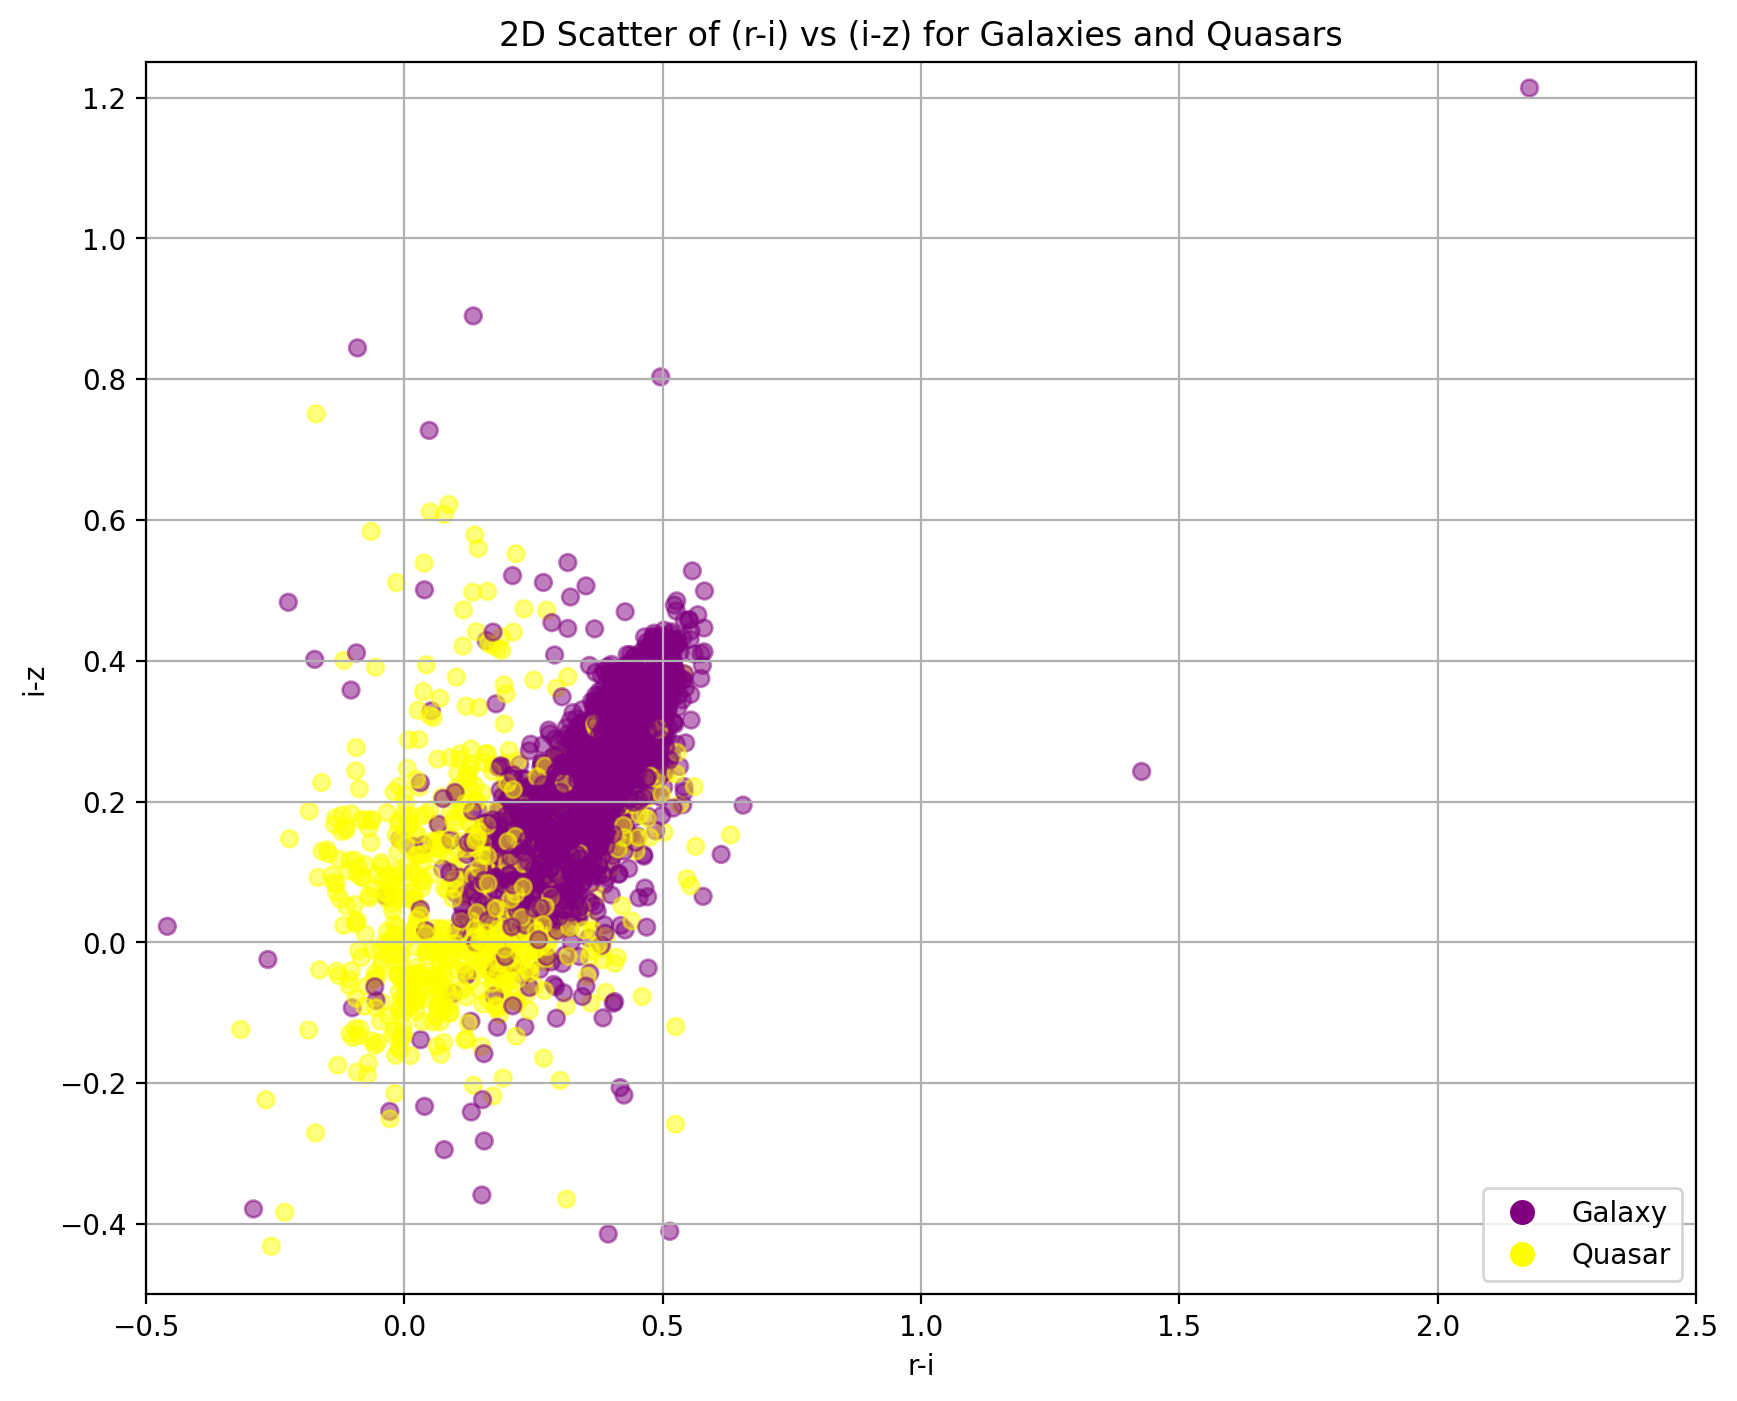

In [46]:
#Set Up color map
color_map = {'GALAXY': 'purple', 'QSO': 'yellow'}
colors = [color_map[category] for category in specClass]  

#plot galaxies and QSOs
plt.figure(figsize=(10, 8))
plt.scatter(r_i, i_z, c=colors, label='Galaxies and Quasars', alpha=0.5)
plt.title('2D Scatter of (r-i) vs (i-z) for Galaxies and Quasars')
plt.xlabel('r-i')
plt.ylabel('i-z')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1.25)

# Set up Legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Galaxy',
                          markerfacecolor='purple', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Quasar',
                          markerfacecolor='yellow', markersize=10)]

plt.legend(handles=legend_elements, loc='lower right')
plt.grid(True)
plt.show()

## Problem 2.3

3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


In [36]:
from sklearn.model_selection import train_test_split
data=data[::10]


# Stack colors and redshift into matrix
X = np.column_stack((r_i, i_z))

# Create target label 
y = np.array([0 if cls == 'GALAXY' else 1 for cls in data['specClass']])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    #0.2 for 20%

print, X_train.shape, y_train.shape

(<function print>, (4000, 2), (4000,))

## Problem 2.4


4. Scale your training and testing data to prepare it for the DNN. 


In [37]:
from sklearn.preprocessing import StandardScaler

# Scaler
scaler = StandardScaler()

# Fit the scaler to data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print, X_train_scaled.shape, X_test.shape

(<function print>, (4000, 2), (1000, 2))

## Problem 2.5

5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


In [38]:
from sklearn.neural_network import MLPClassifier

# Set up MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(5, 2), activation='relu', solver='sgd', random_state=42, max_iter=1000)

# Fit model
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000, random_state=42,
              solver='sgd')

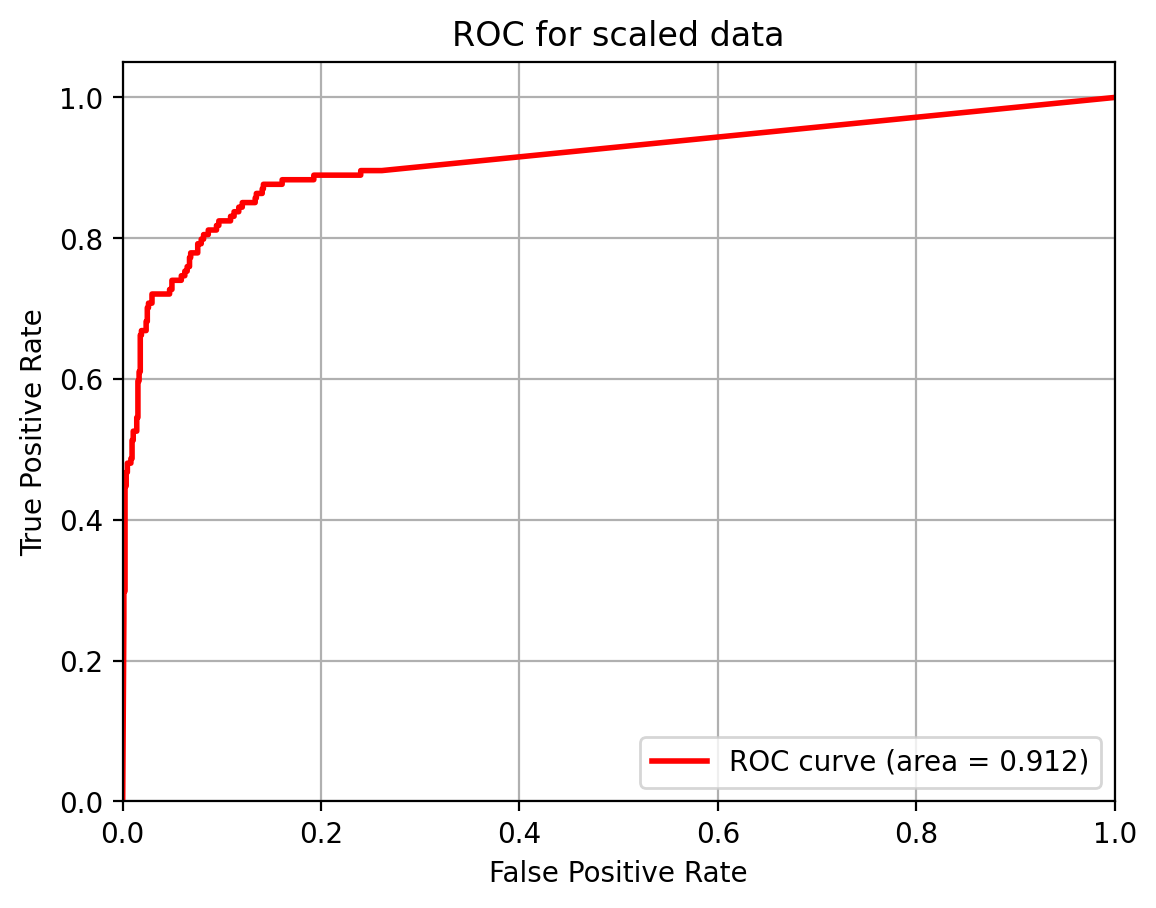

In [39]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_scores = mlp.predict_proba(X_test_scaled)[:, 1]

# Find ROC 
False_Positive, True_Positive, _ = roc_curve(y_test, y_scores)
roc = auc(False_Positive, True_Positive)

# Plot
plt.figure()
plt.plot(False_Positive, True_Positive, color='red', lw=2, label=f'ROC curve (area = {roc:.3f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for scaled data')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

SRT: Excellent!

## Problem 2.6

6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


In [40]:
from sklearn.model_selection import GridSearchCV

# Optimize hyperparameters
parameters = {
    'solver': ['lbfgs', 'sgd', 'adam'],
    'hidden_layer_sizes': [(2, 2), (5, 5), (5, 2), (5, 5, 5)],
    'activation': ['relu', 'tanh'],
    'random_state': [42],
    'max_iter': [1000]
}

#MLPClassifier
mlp = MLPClassifier()

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=parameters, n_jobs=-1, cv=5, verbose=1)
grid_search.fit(X_train_scaled, y_train)


# Make Predictions 
best_model = grid_search.best_estimator_
train_score = best_model.score(X_train_scaled, y_train)


print("Best score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Classification score for training data:", train_score)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/jarretsm/miniforge3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jarretsm/miniforge3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jarretsm/miniforge3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546

Best score: 0.93675
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}
Classification score for training data: 0.93825


## Problem 2.7

7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

In [41]:
#Redo MLPClassifier with best parameters
best_parameters = MLPClassifier(hidden_layer_sizes=(5, 5, 5), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)

# Fit data
best_parameters.fit(X_train_scaled, y_train)

#Make predictions
y_scores_new = best_parameters.predict_proba(X_test_scaled)[:, 1]

False_PositiveNew, True_PositiveNew, _ = roc_curve(y_test, y_scores_new)
rocNew = auc(False_PositiveNew, True_PositiveNew)

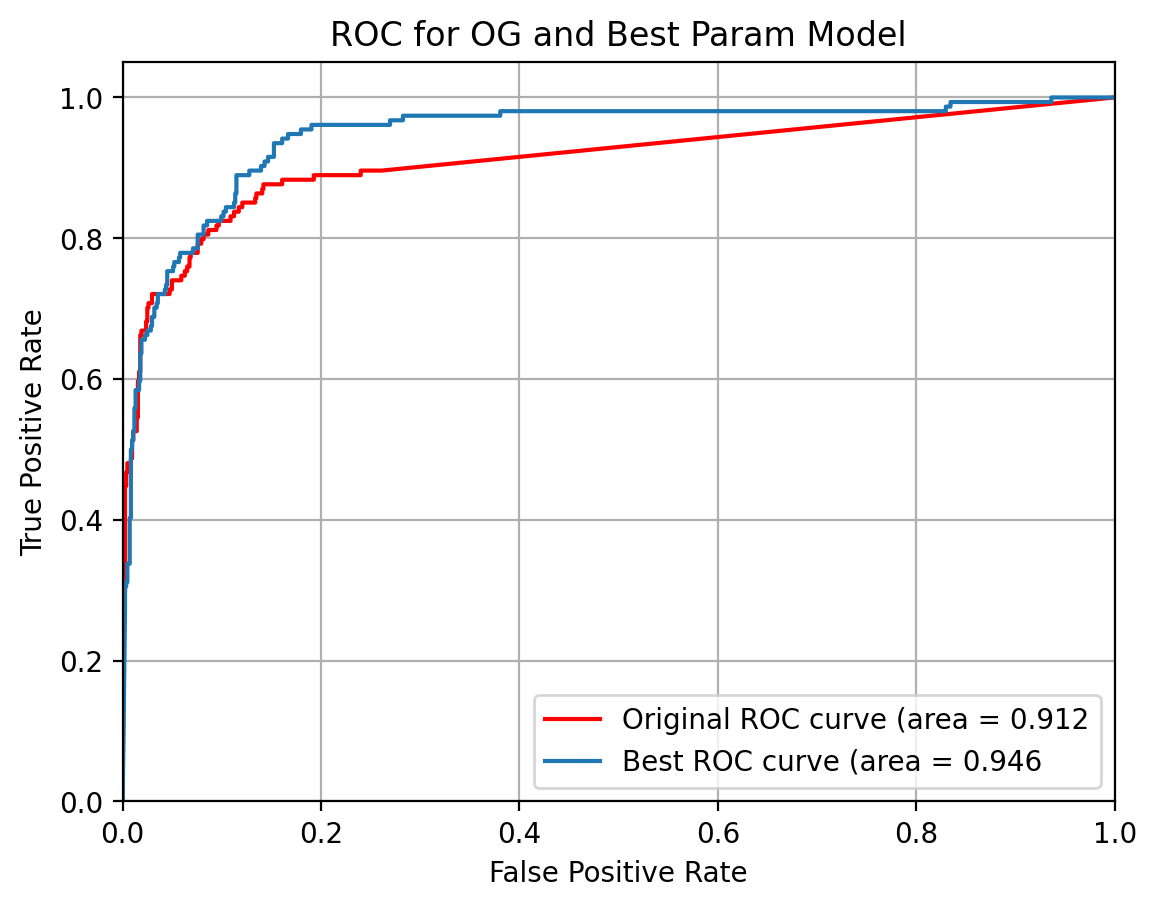

In [47]:
# Plot New and OG Roc
plt.figure()
plt.plot(False_Positive, True_Positive, color='red', label=f'Original ROC curve (area = {roc:.3f}')
plt.plot(False_PositiveNew, True_PositiveNew, label=f'Best ROC curve (area = {rocNew:.3f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for OG and Best Param Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

SRT: Awesome, Shaniya!